In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# imports
import sys
sys.path.append("..")
#import os
#import shutil

from utils.model import Net_mask
import torch
#from torch.distributions.multivariate_normal import MultivariateNormal

import matplotlib.pyplot as plt
import numpy as np

In [3]:
num = 0
e = 4

In [4]:
prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]

In [5]:
model = Net_mask()
model.load_state_dict(torch.load(f'../data/@/weight_init/rml_e{e}_{num}.pth'))
init_weights = torch.cat([param.view(-1) for param in model.parameters()])
#model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e4/100_negativ/model_weights.pth'))
posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])

In [6]:
print(init_weights)
print(prior_weights)
print(posterior_weights)

tensor([ 0.0323,  0.0241,  0.2177,  ...,  0.0099,  0.0236, -0.0335],
       grad_fn=<CatBackward0>)
tensor([ 0.5871,  0.5826, -0.0412,  ..., -0.1107, -0.3478, -0.7406])
tensor([ 0.1253, -0.1223,  0.3171,  ...,  0.0411, -0.0063, -0.0078],
       grad_fn=<CatBackward0>)


In [7]:
print(torch.sum((init_weights + prior_weights)**2))

tensor(1259.1461, grad_fn=<SumBackward0>)


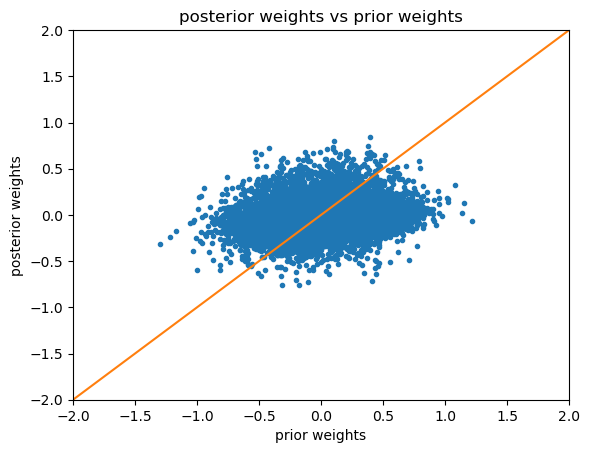

In [8]:
plt.plot(prior_weights.detach(), posterior_weights.detach(), '.', alpha=1)
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('prior weights')
plt.ylabel('posterior weights')
plt.title('posterior weights vs prior weights')
plt.savefig(f'../figures/plot_weights/plot_weights.png')

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   2.,   0.,   0.,
          2.,   0.,   3.,   2.,   2.,   5.,   1.,   5.,   7.,   4.,   4.,
          6.,   7.,  15.,  13.,  14.,  18.,  18.,  20.,  26.,  21.,  26.,
         38.,  45.,  49.,  64.,  80.,  95.,  88., 157., 164., 215., 245.,
        316., 357., 415., 392., 507., 533., 538., 634., 634., 636., 696.,
        654., 616., 566., 555., 448., 412., 349., 291., 276., 251., 228.,
        171., 165., 131., 120.,  78.,  93.,  67.,  65.,  58.,  55.,  33.,
         53.,  38.,  34.,  30.,  30.,  17.,  26.,  20.,  22.,  13.,  22.,
         10.,   6.,  11.,  13.,   7.,   6.,   5.,   7.,   8.,   3.,   2.,
          5.,   3.,   7.,   1.,   2., 

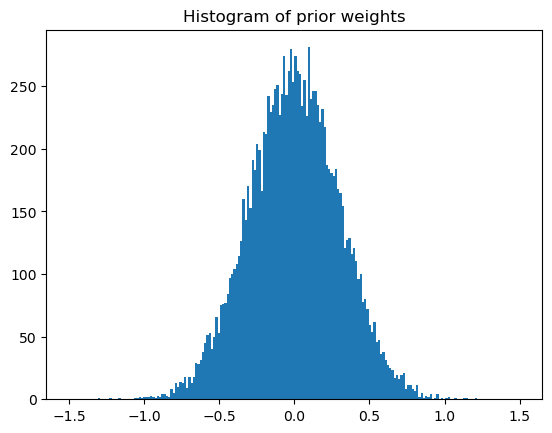

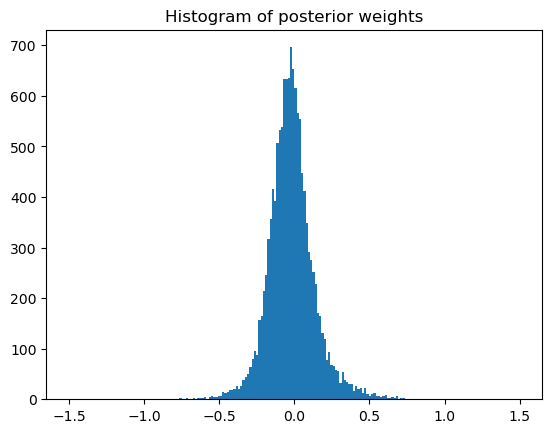

In [9]:
plt.figure(1)
plt.title('Histogram of prior weights')
plt.hist(prior_weights.detach(), range=[-1.5, 1.5], bins=200)
plt.figure(2)
plt.title('Histogram of posterior weights')
plt.hist(posterior_weights.detach(), range=[-1.5, 1.5], bins=200)

In [10]:
sorted_prior, _ = torch.sort(prior_weights)
sorted_posterior, _ = torch.sort(posterior_weights)
print(sorted_prior)
print(sorted_posterior)

tensor([-1.2996, -1.2183, -1.1686,  ...,  1.1347,  1.1547,  1.2137])
tensor([-0.7633, -0.7564, -0.7303,  ...,  0.7427,  0.8023,  0.8395],
       grad_fn=<SortBackward0>)


In [11]:
print(torch.mean(prior_weights))
print(torch.std(prior_weights))
print(torch.mean(posterior_weights))
print(torch.std(posterior_weights))

tensor(-0.0006)
tensor(0.2999)
tensor(-0.0189, grad_fn=<MeanBackward0>)
tensor(0.1546, grad_fn=<StdBackward0>)


Text(0, 0.5, 'prior')

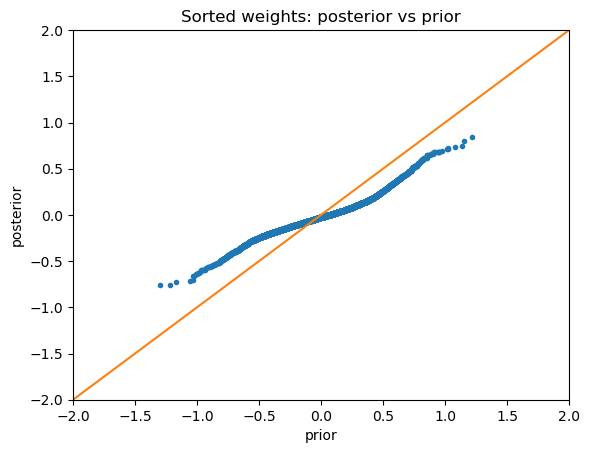

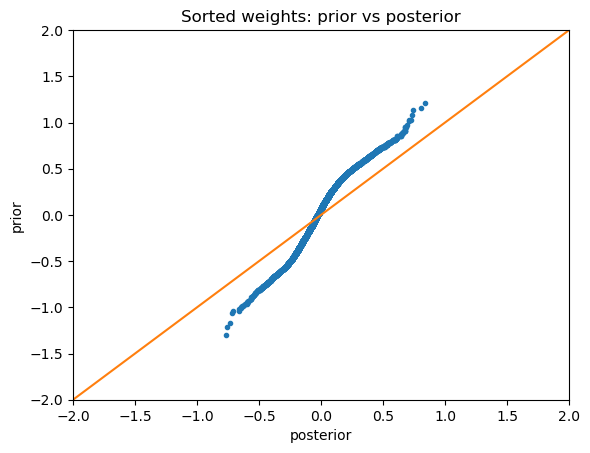

In [12]:
plt.figure()
plt.title('Sorted weights: posterior vs prior')
plt.plot(sorted_prior.detach(), sorted_posterior.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('prior')
plt.ylabel('posterior')
plt.figure()
plt.title('Sorted weights: prior vs posterior')
plt.plot(sorted_posterior.detach(), sorted_prior.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('posterior')
plt.ylabel('prior')